<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Choropleth-Maps" data-toc-modified-id="Choropleth-Maps-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Choropleth Maps</a></span></li></ul></li><li><span><a href="#GeoJSON:-actual-example" data-toc-modified-id="GeoJSON:-actual-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GeoJSON: actual example</a></span></li></ul></div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Choropleth-Maps" data-toc-modified-id="Choropleth-Maps-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Choropleth Maps</a></span></li></ul></li><li><span><a href="#GeoJSON:-actual-example" data-toc-modified-id="GeoJSON:-actual-example-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>GeoJSON: actual example</a></span></li></ul></div>

### Choropleth Maps

![mapa](images/geo_portada.jpg)

In [1]:
#!pip install folium
#!pip install geopandas

In [2]:
import folium
from folium import Choropleth, Circle, Marker, Icon, Map, TileLayer
from folium.plugins import HeatMap, MarkerCluster
#import geopandas as gpd
import pandas as pd
import json
import random
import matplotlib.pyplot as plt

# GeoJSON

In [3]:
# Type point



![Type point](https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/SFA_Point.svg/1920px-SFA_Point.svg.png)

In [4]:
# GeoJSON type: point
{
    "type": "Point", 
        "coordinates": [30.0, 10.0]
}

{'type': 'Point', 'coordinates': [30.0, 10.0]}

In [5]:
# Type multi point

![multi point](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/SFA_MultiPoint.svg/1920px-SFA_MultiPoint.svg.png)

In [6]:
# Multi point
{
    "type": "MultiPoint", 
    "coordinates": [
        [10.0, 40.0], [40.0, 30.0], [20.0, 20.0], [30.0, 10.0]
    ]
}

{'type': 'MultiPoint',
 'coordinates': [[10.0, 40.0], [40.0, 30.0], [20.0, 20.0], [30.0, 10.0]]}

In [7]:
# Type polygon

![type polygon](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/SFA_Polygon.svg/1920px-SFA_Polygon.svg.png)

In [8]:
# GeoJSON: Type polygon
{
    "type": "Polygon", 
    "coordinates": [
        [[30.0, 10.0], [40.0, 40.0], [20.0, 40.0], [10.0, 20.0], [30.0, 10.0]],
    ]
}

{'type': 'Polygon',
 'coordinates': [[[30.0, 10.0],
   [40.0, 40.0],
   [20.0, 40.0],
   [10.0, 20.0],
   [30.0, 10.0]]]}

In [9]:
# Type multi polygon

![Type multi polygon](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dc/SFA_MultiPolygon.svg/1920px-SFA_MultiPolygon.svg.png)

In [10]:
{
    "type": "MultiPolygon", 
    "coordinates": [
        [
            [[30.0, 20.0], [45.0, 40.0], [10.0, 40.0], [30.0, 20.0]]
        ], 
        [
            [[15.0, 5.0], [40.0, 10.0], [10.0, 20.0], [5.0, 10.0], [15.0, 5.0]]
        ]
    ]
}

{'type': 'MultiPolygon',
 'coordinates': [[[[30.0, 20.0], [45.0, 40.0], [10.0, 40.0], [30.0, 20.0]]],
  [[[15.0, 5.0], [40.0, 10.0], [10.0, 20.0], [5.0, 10.0], [15.0, 5.0]]]]}

[Getting your own geojson](https://geojson.io/#map=3.86/33.52/-4.14)

## GeoJSON: actual example

In [11]:
import json

In [12]:
geo_json = "datasets/spain-communities.geojson"

In [13]:
with open (geo_json) as geo_file:
    geo_spain = json.load(geo_file)

In [14]:
castilla_leon = geo_spain["features"][0]["properties"]["name"]

In [15]:
castilla_leon

'Castilla-Leon'

In [16]:
comunidades = []
for i in geo_spain["features"]:
    comunidades.append(i["properties"]["name"])

In [17]:
comunidades

['Castilla-Leon',
 'Cataluña',
 'Ceuta',
 'Murcia',
 'La Rioja',
 'Baleares',
 'Canarias',
 'Cantabria',
 'Andalucia',
 'Asturias',
 'Valencia',
 'Melilla',
 'Navarra',
 'Galicia',
 'Aragon',
 'Madrid',
 'Extremadura',
 'Castilla-La Mancha',
 'Pais Vasco']

We are data analysts but we are going to make up some little facts... sorry 🙄

In [18]:
import random

In [19]:
fake_data = {nombre: random.randint(5678, 3456789)   for nombre in comunidades}

In [20]:
fake_data

{'Castilla-Leon': 789086,
 'Cataluña': 110522,
 'Ceuta': 1312186,
 'Murcia': 601752,
 'La Rioja': 1598740,
 'Baleares': 3301967,
 'Canarias': 2965907,
 'Cantabria': 2796277,
 'Andalucia': 1495047,
 'Asturias': 1502127,
 'Valencia': 867932,
 'Melilla': 1472174,
 'Navarra': 253078,
 'Galicia': 3443337,
 'Aragon': 937913,
 'Madrid': 1259511,
 'Extremadura': 1028039,
 'Castilla-La Mancha': 3065642,
 'Pais Vasco': 517119}

In [21]:
df = pd.DataFrame.from_dict(fake_data, orient="index").reset_index()
df.rename(columns = {"index": "region", 0: "poblacion"}, inplace=True)
df

,region,poblacion
0,Castilla-Leon,789086
1,Cataluña,110522
2,Ceuta,1312186
3,Murcia,601752
4,La Rioja,1598740
5,Baleares,3301967
6,Canarias,2965907
7,Cantabria,2796277
8,Andalucia,1495047
9,Asturias,1502127


In [22]:
spain = Map(location=[40, -3], zoom_start = 5)
spain

In [23]:
# ["features"]["properties"]["name"]

In [24]:
geo_spain

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-4.893577, 43.238479],
       [-4.839201, 43.18976],
       [-4.851778, 43.17307],
       [-4.834567, 43.157463],
       [-4.851426, 43.125945],
       [-4.816903, 43.092658],
       [-4.766497, 43.074547],
       [-4.766114, 43.055633],
       [-4.743985, 43.05645],
       [-4.739274, 43.022276],
       [-4.638131, 43.016673],
       [-4.606084, 43.035767],
       [-4.558449, 43.019515],
       [-4.520932, 43.047368],
       [-4.475713, 43.038702],
       [-4.462752, 43.060535],
       [-4.447551, 43.05854],
       [-4.398114, 43.034868],
       [-4.348485, 42.972581],
       [-4.240249, 42.956533],
       [-4.236703, 42.917112],
       [-4.222565, 42.910978],
       [-4.224679, 42.85677],
       [-4.199694, 42.844571],
       [-4.181202, 42.858694],
       [-4.14426, 42.868615],
       [-4.128477, 42.846267],
       [-4.140447, 42.829002],
       [-4.178566, 

In [28]:
spain = Map(location=[40, -3], zoom_start = 5)
spain

folium.Choropleth(
    # todo junto
    geo_data = geo_spain, 
    data =  df,
    
    # del df sólo estas:
    columns = df.columns,
    
    #del geojson coge el nombre para hacer match con el df
    key_on = "feature.properties.name",
    line_opacity=0.2,
    fill_color = "YlOrRd"
).add_to(spain)
spain;

We make a dataframe with the dictionary that has the list of communities obtained from GeoJSON and the invented data and we rename the columns.

# NYC

Extra: other type of files. Shapefiles. They contain geo info scattered in different files.

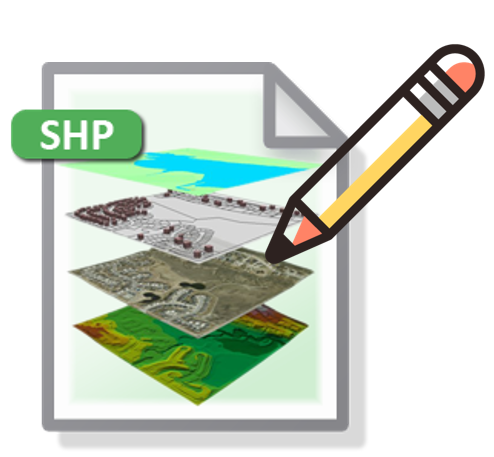